In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Week 12 Lab

## Annoucements:

1. Lab 9 is out - due April 29th at 8 pm
2. HW 3/4 has been released and is due April 27th at 8 PM
3. You should be crushing your final project.

## Lab 9 + 10

These labs are totally optional. 

We will be dropping your two lowest lab grades. So if 9 or 10 are better than an earlier labs, they will replace them.

Regardless, you should do them for practice before the final!

## As always, please email me for questions, office hours, etc.

## Today's Agenda
### How to format final Project
### Correlation

# How to Format Your Final Project?!

# Do it all in one Jupyter Notebook!

## Steps:

1. Create a notebook
2. write the questions and answers in your notebook

Wow, SO EASY.

Ok more details.

Copy each questions into a cell, make that a markdown cell.

Then make a cell under it an answer.

Fell free to have imports in the beginning or wherever you need them (ALSO, use the right Kernal!).

**NUMBER YOUR QUESTIONS**

So, this is what I want it to look like:

1. Pre-step

Describe briefly the question you would like to answer or the topic you would like to explore.
Essentially, what do you hope to learn from your analysis?

BLAH BLAH BLAH

Data

2. Find a dataset that may help you explore at least some of these questions. First, describe
where you found the data set. Second, describe how you found it. Third, describe at least
two variables in the dataset that are relevant to the analysis you described above. Finally,
describe the unit of observation (individual, city, etc.).

BLAH BLAH BLAH

#### Feel free to make use multiple cells to answer, for example some markdown and some code.

BUT! **It must be clear and easy to read.**

FINE, but how do I make a markdown cell? (i.e., something to write in like this cell I am using now?\

Create a cell. Then go up and select markdown.

SO EASY

Please ask me if you have questions.

In [ ]:
Markdown example



In [ ]:
markdown cell

# 1. What is Correlation Intuitively?

At its most basic level correlation is an association between two variables.

What we are studying here is the "Pearson Correlation"

Basically, there are many different ways to measure a relationship between two variables. 

The most common one, often just called the correlation, is what we are studying now.

So what is it?

Correlation is just the measure of linear association between two variables.

What I mean by that is, could we use a line to explain one variable with another.

Let's see an example.

In [2]:
#simulating some data
np.random.seed(0)

a = np.linspace(0,10, 100)
error = np.random.normal(.01, scale =1, size = 100)
b = a + error

Text(0, 0.5, 'B')

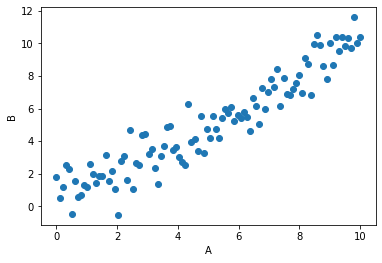

In [3]:
plt.scatter(a,b)
plt.xlabel("A")
plt.ylabel("B")

On the above graph, A is on the X axis, and B is on the Y axis.

We can see, if we drew a line to predict B, we would do a pretty good job. 

Would it be perfect? No, but it is not bad.

Knowing A really, really helps to explain B. 

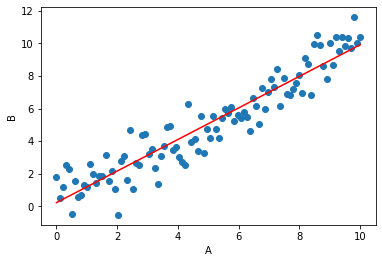

In [4]:
plt.scatter(a,b)
plt.xlabel("A")
plt.ylabel("B")
plt.plot(np.unique(a), np.poly1d(np.polyfit(a, b, 1))(np.unique(a)), color = "red")

Is every point on the line? No, but A is still useful for explaining B with a line.

Correlation is a measure of how strong the linear association between two variables is.

Correlation **does not** tell you what that line is (for example what the slope of the line is).

It tells you, if you had a the best line, how well would it do?

Importantly, there are many non-linear ways to have a strong association.

Here I will create c, which is a function of a.

What I mean is, c is 100% percent determined by a.

If you tell me what a is, I can tell you the value of c.

Specifically $c = a^4$.

Let's graph it.

In [5]:
c = a**4

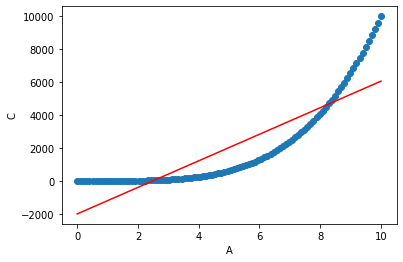

In [6]:
plt.scatter(a,c)
plt.xlabel("A")
plt.ylabel("C")
plt.plot(np.unique(a), np.poly1d(np.polyfit(a, c, 1))(np.unique(a)), color = "red")

Notice how badly the line fits the relationship.

But, we also there is a perfect relationship between them.

But that relationship is not linear!

So there is a correlation between them, but we can only capture the linear part of it.

Correlations can also be negative.

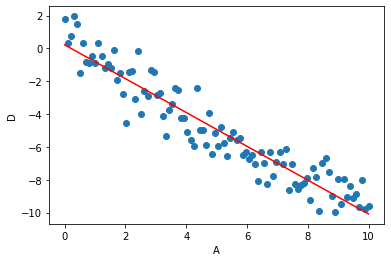

In [7]:
d = -a + error

plt.scatter(a,d)
plt.xlabel("A")
plt.ylabel("D")
plt.plot(np.unique(a), np.poly1d(np.polyfit(a, d, 1))(np.unique(a)), color = "red")

And if there is no relationship at all, the correlation is usually near zero.

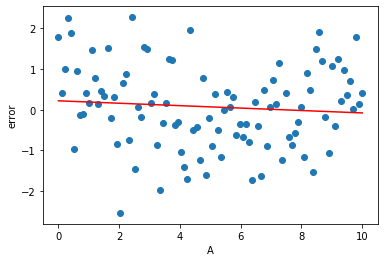

In [8]:
plt.scatter(a,error)
plt.xlabel("A")
plt.ylabel("error")
plt.plot(np.unique(a), np.poly1d(np.polyfit(a, error, 1))(np.unique(a)), color = "red")

# 2. Correlation Nuts and Bolts

So how does correlation work?

Correlation is between two variables.

For us, that means two columns of data.

For example, we might want to measure the correlation between a horse height and horse weight.

Things to know:

1. Correlation is symmetric. So if I have a column "height" and a column "weight" and my correlation function is called `corr`, then:

`corr("height","weight")` is identical to  `corr("weight","height")`. They will always return the exact same number.


2. Correlation is always between -1 and 1. 1 means there is a perfect linear relation between the two variables, -1 means there is a perfect negative linear relationship between the two variables, and 0 means no linear relationship between the two variables.


3. Correlation is a measure of the strength of the **linear** association between two variables.
    1. There are non-linear ways for two variables to be related
    2. Correlation does not tell you the exact relationship (that is regression), it only tells you how well a line would work.
    

4. Correlation is invariant to scale.
    1. This means if I have two variables x and y, and I multiply x by a (for example the number 5), the correlation of 5x and y is the same as x and y.

# 3. How to calculation the correlation?

There is the easy way, and the hard way.

The easy way is to use numpy. The hard way is to do it all ourselves.

Let's do the hard way first and then we can appreciate how nice and fun the easy way is.

We'll work with our variables `a` and `b`, but they are standins for any two variables.

The correlation recipe:

1. Calculate the mean of a, and the mean of b.


2. Calculate the standard deviation of a, and do the same for b.


3. For each value in a, subtract the mean of a, and then divide by the standard deviation of a.
    1. Call this new column "standardized_a"
    
    
4. For each value in b, subtract the mean of b, and then divide by the standard deviation of b. 
    1. Call this new column "standardized_b"
    
    
5. Then, multiple the values of standardized_a and standardized_b together.
    1. That means take the first value in standardized_a and multiply it with the first value in standardized_b (i.e., standardized_a[0]* standardized_b[0])
    2. Then take the second value in standardized_a and multiply it with the second value in standardized_b (i.e., standardized_a[1]* standardized_b[1])
    3. Do this for the third values, then fourth, etc.
    
    
6. Then add all these values up.
    1. Take the multipled numbers from the first row, add them to the second rows multiplied numbers, then the third, etc.
    2. So add standardized_a[0]* standardized_b[0] + standardized_a[1]* standardized_b[1] + ...
    
    
### Let's see this in code

In [9]:
#Step 1:

mean_a = np.mean(a)
mean_b = np.mean(b)

#Step 2:

std_a = np.std(a)
std_b = np.std(b)

#Step 3:

standardized_a = (a - mean_a)/std_a

#Step 4:

standardized_b = (b - mean_b)/std_b

#Step 5:

multiplied_rows = standardized_a * standardized_b

#step 6:

correlation = np.sum(multiplied_rows)
    

In [10]:
correlation

94.23980445319913

## What about the easy way?

In [11]:
np.corrcoef(a,b)

array([[1.        , 0.94239804],
       [0.94239804, 1.        ]])

Wow, much easier!

Questions:

1. Why is our number 94.2398 and numpy's .9423804?

Basically, we our method just calculates a number that is larger by a factor of 100. If we just divide our method by 100 we will get the same thing.

Our "recipe" is the easiest way to do calculate it, but it makes it too big by a factor of 100.

2. Why does numpy produce a matrix rather than just one number?

You can actually give numpy a bunch of variables and it will calculate the correlation for all of them. That's beyond what we are doing here, but notice it gives is .94 and 1. The 1 is the correlation of the variables with themselves (a with a and b with b), and the two .94 are the correlations both ways (a with b and b with a). 

3. How do I get the correlation numbers for numpy?

Just index in. First the row, then slice again for the column.

This is first row, second colum.

In [12]:
np.corrcoef(a,b)[0][1]

0.9423980445319917

Or second row, first column.

In [13]:
np.corrcoef(a,b)[1][0]

0.9423980445319918

# Let's see a real world examples

We'll be using a country level drinking dataset from 538

In [14]:
drinks_data = pd.read_csv("drinks.csv")

In [15]:
drinks_data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


We might thing there is a relationship between beer and spirit servings.

Maybe, countries that like to drink alcohol like to drink alot of both.

Or, maybe countries usually prefer one type over the other, so if they drink a lot of beer they don't drink many spirits, or vice versa.

Or, maybe there is not relationship at all.

Let's see.

Text(0, 0.5, 'spirits')

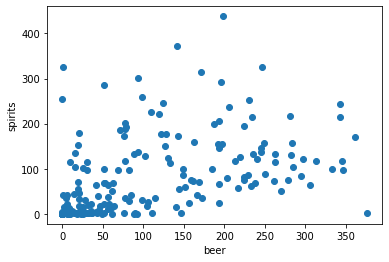

In [16]:
plt.scatter(drinks_data.beer_servings,drinks_data.spirit_servings)
plt.xlabel("beer")
plt.ylabel("spirits")

What is the correlation?

In [17]:
np.corrcoef(drinks_data.beer_servings,drinks_data.spirit_servings)

array([[1.        , 0.45881887],
       [0.45881887, 1.        ]])

Intesting. Notice we could also do this:

In [18]:
drinks_data.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


This is ALL of the correlations. Neat.

It looks like countries that drink more likely drink more of both.

Let's look at another dataset.

In [19]:
hate_data = pd.read_csv("hate_crimes.csv")
hate_data.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [20]:
hate_data.columns

Index(['state', 'median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'hate_crimes_per_100k_splc',
       'avg_hatecrimes_per_100k_fbi'],
      dtype='object')

This is data on hate crimes.

We might think there may be relationship between income and hate crimes.

For example, poorer areas may be more inclined to commit hate crimes.

If we think that low incomes may explain hate crimes, then we might say:

Low income is the **indepedent variable** and number of hate crimes is the **dependent variable**.

That means low income would typically go on the X axis, and number of hate crimes on the Y axis. 

We will do ALOT more on this language next week.

Let's look.

Text(0, 0.5, 'Number of Hate Crimes')

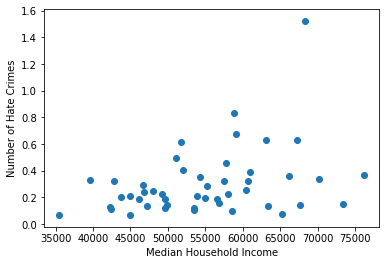

In [21]:
plt.scatter(hate_data.median_household_income, hate_data.hate_crimes_per_100k_splc)
plt.xlabel("Median Household Income")
plt.ylabel("Number of Hate Crimes")

Is there one?

In [22]:
np.corrcoef(hate_data.median_household_income, hate_data.hate_crimes_per_100k_splc)

array([[ 1., nan],
       [nan, nan]])

What? WHY?!

Well, there is some missing data, and numpy just can't handle it.

Good news, pandas can.

In [23]:
hate_data.corr()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
median_household_income,1.000000,-0.376722,0.286480,0.653490,0.302288,-0.818045,-0.178821,0.103775,-0.597528,0.350714,0.318246
share_unemployed_seasonal,-0.376722,1.000000,0.358113,-0.621168,0.278899,0.209440,0.541659,0.431847,-0.148192,0.083292,0.073936
share_population_in_metro_areas,0.286480,0.358113,1.000000,-0.268846,0.745464,-0.385559,0.515843,0.547672,-0.570695,0.162217,0.209827
share_population_with_high_school_degree,0.653490,-0.621168,-0.268846,1.000000,-0.277009,-0.494008,-0.592052,-0.434846,-0.155656,0.308944,0.164148
share_non_citizen,0.302288,0.278899,0.745464,-0.277009,1.000000,-0.389718,0.480257,0.733655,-0.631194,0.243507,0.300892
share_white_poverty,-0.818045,0.209440,-0.385559,-0.494008,-0.389718,1.000000,0.032584,-0.269449,0.552849,-0.286170,-0.260094
gini_index,-0.178821,0.541659,0.515843,-0.592052,0.480257,0.032584,1.000000,0.468467,-0.411543,0.329439,0.421272
share_non_white,0.103775,0.431847,0.547672,-0.434846,0.733655,-0.269449,0.468467,1.000000,-0.488838,0.047561,0.083525
share_voters_voted_trump,-0.597528,-0.148192,-0.570695,-0.155656,-0.631194,0.552849,-0.411543,-0.488838,1.000000,-0.657067,-0.504532
hate_crimes_per_100k_splc,0.350714,0.083292,0.162217,0.308944,0.243507,-0.286170,0.329439,0.047561,-0.657067,1.000000,0.758700


And this is how you can get one specific value.

Use .loc (short for location). Then tell it the name of the row, and then the name of the column.

In [24]:
hate_data.corr().loc['median_household_income',"hate_crimes_per_100k_splc"]

0.35071430328876174

In [25]:
hate_data.corr().loc["hate_crimes_per_100k_splc",'median_household_income']

0.35071430328876174

In [26]:
hate_data.corr().loc["hate_crimes_per_100k_splc",:]

median_household_income                     0.350714
share_unemployed_seasonal                   0.083292
share_population_in_metro_areas             0.162217
share_population_with_high_school_degree    0.308944
share_non_citizen                           0.243507
share_white_poverty                        -0.286170
gini_index                                  0.329439
share_non_white                             0.047561
share_voters_voted_trump                   -0.657067
hate_crimes_per_100k_splc                   1.000000
avg_hatecrimes_per_100k_fbi                 0.758700
Name: hate_crimes_per_100k_splc, dtype: float64

What does this mean?

Why might be misleading?